In [3]:
#pip install sodapy

In [4]:
from sodapy import Socrata
import pandas as pd
#from google.colab import drive
import re

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Exploratory Data Analysis on the NYC 311 Service Request Open Data

By: Oscar E. Gallardo

This data analysis project is to explore the open data of NYC 311 Service Requests. In this project I explore the data based on several attributes/columns to create informative visuals. I examine the top complaint that is called in and in each borough. I analyze which community board is most affected by heat or hot water issues based on the frequency in those complaints in each community board. I also analyze frequency of total calls by hour and agency.  

### API

In [6]:
# We request the 150,000 most recent 311 service request calls made

In [7]:
client = Socrata("data.cityofnewyork.us", None)

client.timeout = 1000
results = client.get("erm2-nwe9", limit=150000)

In [8]:
# Creating a DataFrame from client results using pandas library
df = pd.DataFrame.from_records(results)

In [9]:
# Getting information on the attributes/columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   unique_key                      150000 non-null  object
 1   created_date                    150000 non-null  object
 2   agency                          150000 non-null  object
 3   agency_name                     150000 non-null  object
 4   complaint_type                  150000 non-null  object
 5   descriptor                      149004 non-null  object
 6   location_type                   127760 non-null  object
 7   incident_zip                    147675 non-null  object
 8   incident_address                141136 non-null  object
 9   street_name                     141128 non-null  object
 10  cross_street_1                  85970 non-null   object
 11  cross_street_2                  85897 non-null   object
 12  intersection_street_1         

In [10]:
df.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,...,resolution_action_updated_date,bridge_highway_name,bridge_highway_segment,facility_type,taxi_pick_up_location,bridge_highway_direction,road_ramp,due_date,taxi_company_borough,vehicle_type
0,53201006,2022-01-29T01:59:09.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11214,260 BAY 22 STREET,BAY 22 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53202211,2022-01-29T01:58:02.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11358,45-55 165 STREET,165 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53197456,2022-01-29T01:56:53.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,336 LEXINGTON AVENUE,LEXINGTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53199676,2022-01-29T01:56:52.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11215,446 3 AVENUE,3 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53200893,2022-01-29T01:55:32.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11385,1874 CORNELIA STREET,CORNELIA STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# check null values
df.isnull().sum()

unique_key                             0
created_date                           0
agency                                 0
agency_name                            0
complaint_type                         0
descriptor                           996
location_type                      22240
incident_zip                        2325
incident_address                    8864
street_name                         8872
cross_street_1                     64030
cross_street_2                     64103
intersection_street_1              69592
intersection_street_2              69530
address_type                        1445
city                                6432
landmark                           81506
status                                 0
community_board                        0
bbl                                17662
borough                                0
x_coordinate_state_plane            2093
y_coordinate_state_plane            2077
open_data_channel_type                 0
park_facility_na

In [12]:
#exclude unnecessary columns
df = df[['unique_key', 'created_date', 'complaint_type', 'agency', 'agency_name', 'community_board', 
         'latitude', 'longitude', 'descriptor', 'borough', 'incident_zip', 'incident_address', 'street_name', 'city', 'status','resolution_description', 'resolution_action_updated_date', 'closed_date']]

In [13]:
df.head()

,unique_key,created_date,complaint_type,agency,agency_name,community_board,latitude,longitude,descriptor,borough,incident_zip,incident_address,street_name,city,status,resolution_description,resolution_action_updated_date,closed_date
0,53201006,2022-01-29T01:59:09.000,Illegal Parking,NYPD,New York City Police Department,11 BROOKLYN,40.600577497154156,-74.00483625272479,Blocked Hydrant,BROOKLYN,11214,260 BAY 22 STREET,BAY 22 STREET,BROOKLYN,In Progress,NaN,NaN,NaN
1,53202211,2022-01-29T01:58:02.000,Illegal Parking,NYPD,New York City Police Department,07 QUEENS,40.75327991534196,-73.80176062992689,Blocked Hydrant,QUEENS,11358,45-55 165 STREET,165 STREET,FLUSHING,In Progress,NaN,NaN,NaN
2,53197456,2022-01-29T01:56:53.000,Noise - Residential,NYPD,New York City Police Department,03 BROOKLYN,40.68829918488565,-73.94593434413397,Loud Music/Party,BROOKLYN,11216,336 LEXINGTON AVENUE,LEXINGTON AVENUE,BROOKLYN,In Progress,NaN,NaN,NaN
3,53199676,2022-01-29T01:56:52.000,Noise - Residential,NYPD,New York City Police Department,06 BROOKLYN,40.67197735694266,-73.99060553483706,Loud Music/Party,BROOKLYN,11215,446 3 AVENUE,3 AVENUE,BROOKLYN,In Progress,NaN,NaN,NaN
4,53200893,2022-01-29T01:55:32.000,Noise - Residential,NYPD,New York City Police Department,05 QUEENS,40.70250831911804,-73.90323162556705,Loud Music/Party,QUEENS,11385,1874 CORNELIA STREET,CORNELIA STREET,RIDGEWOOD,In Progress,NaN,NaN,NaN


In [14]:
df.complaint_type.unique()

array(['Illegal Parking', 'Noise - Residential', 'Noise - Commercial',
       'Snow or Ice', 'Noise - Street/Sidewalk', 'Blocked Driveway',
       'Noise - Vehicle', 'Animal in a Park', 'Smoking',
       'Homeless Person Assistance', 'Encampment', 'Indoor Air Quality',
       'Panhandling', 'New Tree Request', 'Traffic Signal Condition',
       'Dead/Dying Tree', 'Damaged Tree', 'Animal-Abuse',
       'Illegal Animal Kept as Pet', 'Street Condition',
       'Non-Emergency Police Matter', 'Drinking', 'Noise', 'Obstruction',
       'Face Covering Violation', 'Rodent',
       'Vaccine Mandate Non-Compliance', 'For Hire Vehicle Complaint',
       'Water Quality', 'Construction Lead Dust', 'Pet Shop',
       'HEAT/HOT WATER', 'Litter Basket Request', 'Abandoned Vehicle',
       'UNSANITARY CONDITION', 'Illegal Tree Damage', 'Lead',
       'PAINT/PLASTER', 'Residential Disposal Complaint', 'Sewer',
       'Dirty Condition', 'Maintenance or Facility',
       'Street Light Condition', 'WATER L

In [15]:
df.agency.unique()

array(['NYPD', 'DSNY', 'DPR', 'DOHMH', 'DHS', 'DOT', 'DEP', 'TLC', 'HPD',
       'DCA', 'DOB', 'MAYORâ\x80\x99S OFFICE OF SPECIAL ENFORCEMENT',
       'DOE', 'EDC', 'DFTA', 'DOITT'], dtype=object)

In [16]:
def update_OSE(agency):
  """Takes in an agency name and converts to abbreviated form, if the agency is
     the Office of Special Enforcement."""

  if agency == 'MAYORâ\x80\x99S OFFICE OF SPECIAL ENFORCEMENT':
      return "OSE"
  else:
      return agency
    
df.agency = df.agency.map(lambda agency: update_OSE(agency))

In [17]:
noise_columns = []

for i in df.complaint_type:
   if i.startswith('Noise') and i not in noise_columns:
     noise_columns.append(i)
noise_columns

['Noise - Residential',
 'Noise - Commercial',
 'Noise - Street/Sidewalk',
 'Noise - Vehicle',
 'Noise',
 'Noise - Park',
 'Noise - House of Worship',
 'Noise - Helicopter']

In [18]:
#Label unspecified noise complaints as 'Noise - Unspecified'
# Takes in an complaint name and updates it, if it is an unspecified noise complaint.
def update_noise(complaint):
  if complaint == 'Noise':
    return "Noise - Unspecified"
  else:
    return complaint
    
df.complaint_type = df.complaint_type.map(
    lambda complaint: update_noise(complaint))

In [19]:
type(df.created_date[1])

str

In [20]:
#convert date column to datetime 
df['created_date'] = pd.to_datetime(df['created_date'], 
                                    format='%Y-%m-%dT%H:%M:%S.%f')

In [21]:
#check new data type for created_date column
type(df['created_date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
# create new columns with the day, month, day of week, and hour of each call. 
# This will allow us to explore the independent relationship of each variable to other characteristics of the calls.

In [23]:
df['day'] = [str(i.date()) for i in df.created_date]
df['month'] = [int(i.month) for i in df.created_date]
df['day_of_week'] = [int(i.weekday()) for i in df.created_date]
df['hour'] = [int(i.hour) for i in df.created_date]

In [24]:
df['day'].unique()

array(['2022-01-29', '2022-01-28', '2022-01-27', '2022-01-26',
       '2022-01-25', '2022-01-24', '2022-01-23', '2022-01-22',
       '2022-01-21', '2022-01-20', '2022-01-19', '2022-01-18',
       '2022-01-17', '2022-01-16', '2022-01-15', '2022-01-14',
       '2022-01-13', '2022-01-12', '2022-01-11', '2022-01-10'],
      dtype=object)

In [25]:
df[df['day'] == '2022-01-14']

,unique_key,created_date,complaint_type,agency,agency_name,community_board,latitude,longitude,descriptor,borough,...,street_name,city,status,resolution_description,resolution_action_updated_date,closed_date,day,month,day_of_week,hour
109940,53061590,2022-01-14 23:59:46,Illegal Parking,NYPD,New York City Police Department,03 BROOKLYN,40.6791471172615,-73.93848595157297,Blocked Hydrant,BROOKLYN,...,ALBANY AVENUE,BROOKLYN,Closed,The Police Department issued a summons in resp...,2022-01-15T00:39:08.000,2022-01-15T00:39:01.000,2022-01-14,1,4,23
109941,53063610,2022-01-14 23:59:33,Noise - Residential,NYPD,New York City Police Department,09 BRONX,40.83261900218038,-73.87628697544656,Banging/Pounding,BRONX,...,STRATFORD AVENUE,BRONX,Closed,The Police Department responded to the complai...,2022-01-15T00:06:30.000,2022-01-15T00:06:24.000,2022-01-14,1,4,23
109942,53056660,2022-01-14 23:59:08,Illegal Parking,NYPD,New York City Police Department,03 BROOKLYN,40.69395070129018,-73.94600909609325,Blocked Hydrant,BROOKLYN,...,TOMPKINS AVENUE,BROOKLYN,Closed,The Police Department responded to the complai...,2022-01-15T00:08:20.000,2022-01-15T00:08:15.000,2022-01-14,1,4,23
109943,53061034,2022-01-14 23:59:00,Street Light Condition,DOT,Department of Transportation,11 BROOKLYN,40.60559672299342,-73.98403520459637,Street Light Out,BROOKLYN,...,WEST 11 STREET,BROOKLYN,Assigned,Service Request status for this request is ava...,2022-01-26T11:52:00.000,NaN,2022-01-14,1,4,23
109944,53056241,2022-01-14 23:58:54,Rodent,DOHMH,Department of Health and Mental Hygiene,12 MANHATTAN,40.868267734000455,-73.92455372965492,Mouse Sighting,MANHATTAN,...,SEAMAN AVENUE,NEW YORK,Closed,This service request was closed because the De...,2022-01-14T23:58:54.000,2022-01-20T13:55:37.000,2022-01-14,1,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117244,53062641,2022-01-14 00:00:32,HEAT/HOT WATER,HPD,Department of Housing Preservation and Develop...,10 MANHATTAN,40.81771010223045,-73.93821697256283,APARTMENT ONLY,MANHATTAN,...,LENOX AVENUE,NEW YORK,Closed,The complaint you filed is a duplicate of a co...,2022-01-15T00:00:00.000,2022-01-15T11:58:22.000,2022-01-14,1,4,0
117245,53055449,2022-01-14 00:00:25,Street Sign - Missing,DOT,Department of Transportation,07 QUEENS,40.77519113101208,-73.79852896378222,Other/Unknown,QUEENS,...,24 ROAD,NaN,In Progress,The Department of Transportation inspected the...,2022-01-14T09:15:25.000,NaN,2022-01-14,1,4,0
117246,53052964,2022-01-14 00:00:16,Blocked Driveway,NYPD,New York City Police Department,11 BRONX,40.868574991645396,-73.86437176637796,Partial Access,BRONX,...,WALLACE AVENUE,BRONX,Closed,The Police Department issued a summons in resp...,2022-01-14T01:48:38.000,2022-01-14T01:48:33.000,2022-01-14,1,4,0
117247,53053243,2022-01-14 00:00:13,Noise - Vehicle,NYPD,New York City Police Department,10 MANHATTAN,40.805032463482874,-73.95682044265718,Car/Truck Music,MANHATTAN,...,MANHATTAN AVENUE,NaN,Closed,The Police Department responded to the complai...,2022-01-14T00:54:09.000,2022-01-14T00:54:04.000,2022-01-14,1,4,0


#### NYC’S Agency from highest to lowest complaint call volume

In [26]:
df.agency.value_counts()
# NYC Agency |Total Complaint Calls

NYPD     52651
HPD      50474
DOT      12484
DSNY      9726
DEP       9103
DOHMH     4488
DOB       3872
DPR       2573
DHS       1559
EDC       1120
TLC        960
DCA        814
DOE        116
OSE         40
DFTA        15
DOITT        5
Name: agency, dtype: int64

NYPD, HPD, DSNY, DOT, and DEP are the top 5 NYC agencies with the highest complaint calls as of January 2022. Based on data from December 30, 2020- January 20, 2022. *

### Exploratory Data Analysis

#### Total Calls by Hour and Agency

In [27]:
def hour_call_freq_df(agency):

  """Takes in an agency name as a string. Returns a dataframe with agencies 
     and the total number of calls related to the given agency that were made 
     at each hour of the day."""

  subset = df[df.agency==agency]
    
  call_freqs_by_hour = {}
    
  for hour in subset.hour:
    
      if hour not in call_freqs_by_hour: 
            call_freqs_by_hour[hour] = 1
        
      else:
            call_freqs_by_hour[hour] += 1
  
  freq_df = pd.DataFrame.from_dict(call_freqs_by_hour, orient='index',
                                   columns=['{}'.format(agency)])
    
  return freq_df.sort_index()

In [28]:
NYPD = hour_call_freq_df('NYPD')
HPD = hour_call_freq_df('HPD')
DPR = hour_call_freq_df('DPR')
DOT = hour_call_freq_df('DOT')
DEP = hour_call_freq_df('DEP')
DSNY = hour_call_freq_df('DSNY')

In [29]:
NYPD.head()

,NYPD
0,2694
1,1864
2,1187
3,853
4,830


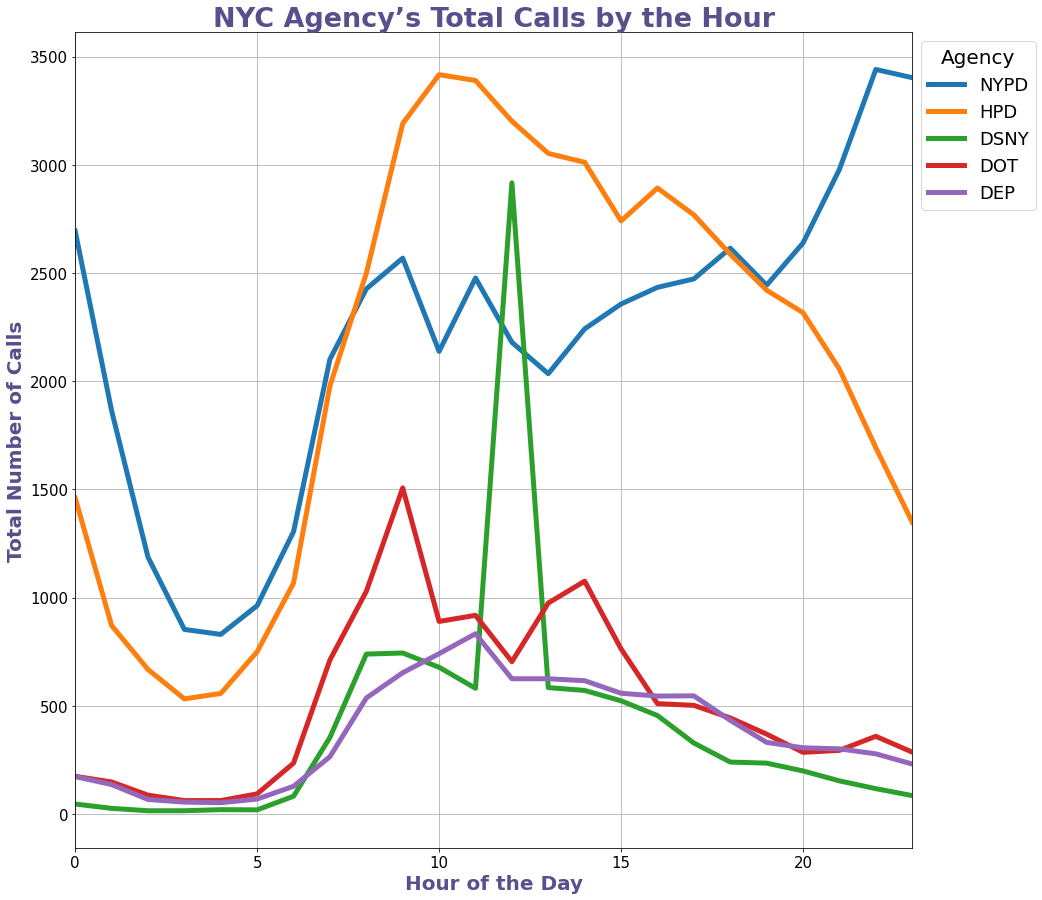

In [30]:
font_dict = dict(size=20, color="#58508d", fontweight='bold')
title_font_dict = dict(size=27, color="#58508d", fontweight='bold')

plt.figure(figsize=(15, 15))
plt.plot(NYPD.index, NYPD.NYPD, label="NYPD", linewidth=5)
plt.plot(HPD.index, HPD.HPD, label="HPD", linewidth=5)
plt.plot(DSNY.index, DSNY.DSNY, label="DSNY", linewidth=5)
plt.plot(DOT.index, DOT.DOT, label="DOT", linewidth=5)
plt.plot(DEP.index, DEP.DEP, label="DEP", linewidth=5)
plt.ylabel('Total Number of Calls', fontdict=font_dict)
plt.xlabel('Hour of the Day', fontdict=font_dict)
plt.title('NYC Agency’s Total Calls by the Hour', fontdict=title_font_dict)
plt.legend(title="Agency", title_fontsize=20, fontsize=18, 
           bbox_to_anchor=[1,1]) #position legend outside of plot
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(right=23) 
plt.xlim(left=0) 
plt.grid()

### Call Volume by Complaint Type and Date

#### NYC’s Highest to Lowest Complaint Types 

In [31]:
df.complaint_type.value_counts()
# NYC Complaint Types|Total Complaint Calls

HEAT/HOT WATER               39531
Illegal Parking              18704
Noise - Residential          12876
Blocked Driveway              7507
Street Condition              3950
                             ...  
FHV Licensee Complaint           1
Public Payphone Complaint        1
X-Ray Machine/Equipment          1
Dept of Investigations           1
Oil or Gas Spill                 1
Name: complaint_type, Length: 164, dtype: int64

As of January 2022, heat and hot water was NYC ‘s top complaint followed by Illegal parking, residential noise complaints, blocked driveway, and water system. 

In [32]:
## Using top complaint types

In [33]:
def date_call_freq_df(complaint_type):
  """Takes in a complaint type as a string. Returns a dataframe with dates 
     and the total number of calls related to the given complaint that were made 
     on each date."""
    
  subset = df[df.complaint_type==complaint_type]  
  call_freqs_by_date = {}
    
  for date in subset.day:
      if date not in call_freqs_by_date: 
            call_freqs_by_date[date] = 1
      else:
            call_freqs_by_date[date] += 1
    
  freq_df = pd.DataFrame.from_dict(call_freqs_by_date, orient='index', 
                                   columns=['{}'.format(complaint_type)])
  return freq_df.sort_index()

In [34]:
# call frequency dataframes for top 5 complaint types
heat_hot_water_Date = date_call_freq_df('HEAT/HOT WATER')
illegal_parking_Date = date_call_freq_df('Illegal Parking')
noise_residential_Date = date_call_freq_df('Noise - Residential')
blocked_driveway_Date = date_call_freq_df('Blocked Driveway')
#noise_street_Date = date_call_freq_df('Noise - Street/Sidewalk')
water_system_Date = date_call_freq_df('Water System')

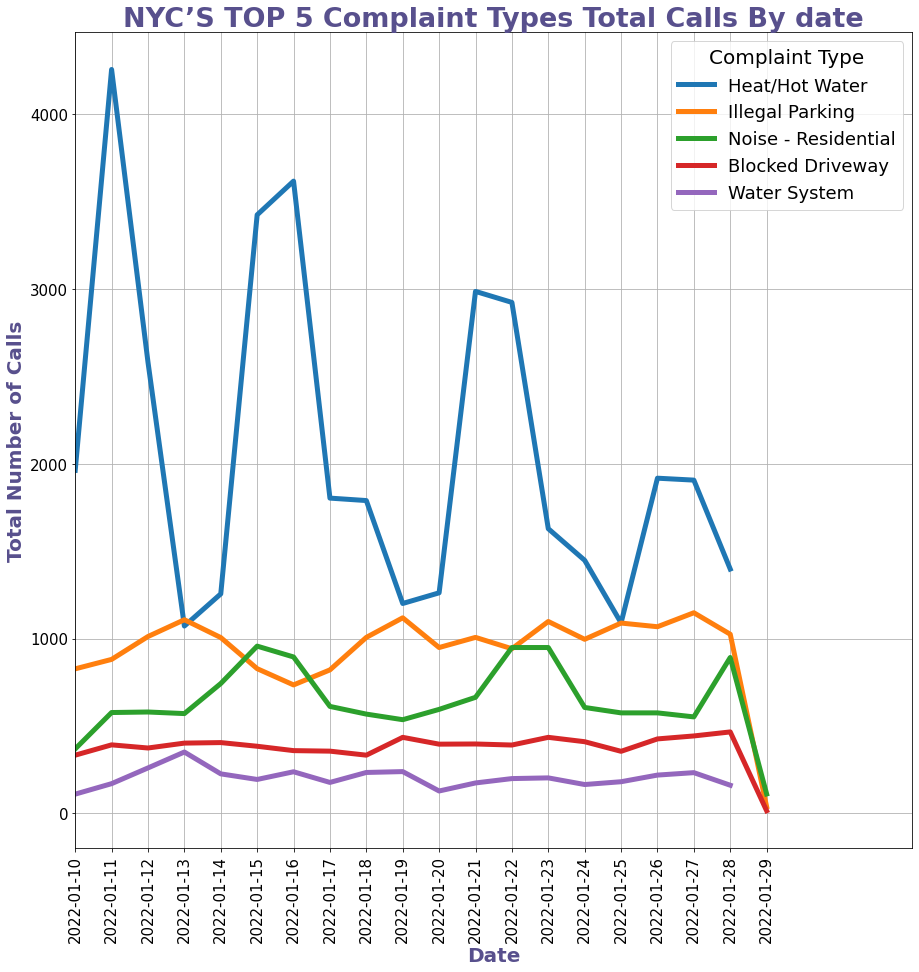

In [35]:
font_dict = dict(size=20, color="#58508d", fontweight='bold')
title_font_dict = dict(size=27, color="#58508d", fontweight='bold')

plt.figure(figsize=(15, 15))
plt.plot(heat_hot_water_Date.index, heat_hot_water_Date['HEAT/HOT WATER'], label="Heat/Hot Water", linewidth=5)
plt.plot(illegal_parking_Date.index, illegal_parking_Date['Illegal Parking'], label="Illegal Parking", linewidth=5)
plt.plot(noise_residential_Date.index, noise_residential_Date['Noise - Residential'], label="Noise - Residential", linewidth=5)
plt.plot(blocked_driveway_Date.index, blocked_driveway_Date['Blocked Driveway'], label="Blocked Driveway", linewidth=5)
plt.plot(water_system_Date.index, water_system_Date['Water System'], label="Water System", linewidth=5)
plt.ylabel('Total Number of Calls', fontdict=font_dict)
plt.xlabel('Date', fontdict=font_dict)
plt.title('NYC’S TOP 5 Complaint Types Total Calls By date', fontdict=title_font_dict)
plt.legend(title="Complaint Type", title_fontsize=20, fontsize=18, 
           bbox_to_anchor=[1,1]) #position legend outside of plot
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
plt.xlim(right=23) 
plt.xlim(left=0) 
plt.grid()

## - From 12-21-2021 - 01-13-2022

Analysis - 
This graph shows the frequency of calls within the last 15 days based on the top 5 complaint types in this dataset. It shows that Heat/Hot water complaints lead any other complaint type and has peaked numerous times within the last 15 days. This analysis should take into consideration that we are taking the 150,000 most recent 311 service request calls and that it being winter season at the time of this data request is the reason of peak in Heat/Hot Water complaints.

### Top 5 Complaint Types Frequency by Hour

In [36]:
def hour_complaint_freq_df(complaint_type):
  """Takes in a complaint type as a string. Returns a dataframe with dates 
     and the total number of calls related to the given complaint that were made 
     on each date."""
    
  subset = df[df.complaint_type==complaint_type]  
  call_freqs_by_hour = {}
    
  for hour in subset.hour:
      if hour not in call_freqs_by_hour: 
            call_freqs_by_hour[hour] = 1
      else:
            call_freqs_by_hour[hour] += 1
    
  freq_df = pd.DataFrame.from_dict(call_freqs_by_hour, orient='index', 
                                   columns=['{}'.format(complaint_type)])
  return freq_df.sort_index()

In [37]:
# call frequency dataframes for top 5 complaint types
heat_hot_water = hour_complaint_freq_df('HEAT/HOT WATER')
illegal_parking = hour_complaint_freq_df('Illegal Parking')
noise_residential = hour_complaint_freq_df('Noise - Residential')
blocked_driveway = hour_complaint_freq_df('Blocked Driveway')
noise_street = hour_complaint_freq_df('Noise - Street/Sidewalk')
water_system = hour_complaint_freq_df('Water System')

In [38]:
# checking frequency dataframes
heat_hot_water.head(5)

,HEAT/HOT WATER
0,1263
1,769
2,588
3,457
4,485


In [39]:
heat_hot_water.shape

(24, 1)

In [40]:
noise_residential.head()

,Noise - Residential
0,1113
1,755
2,475
3,349
4,326


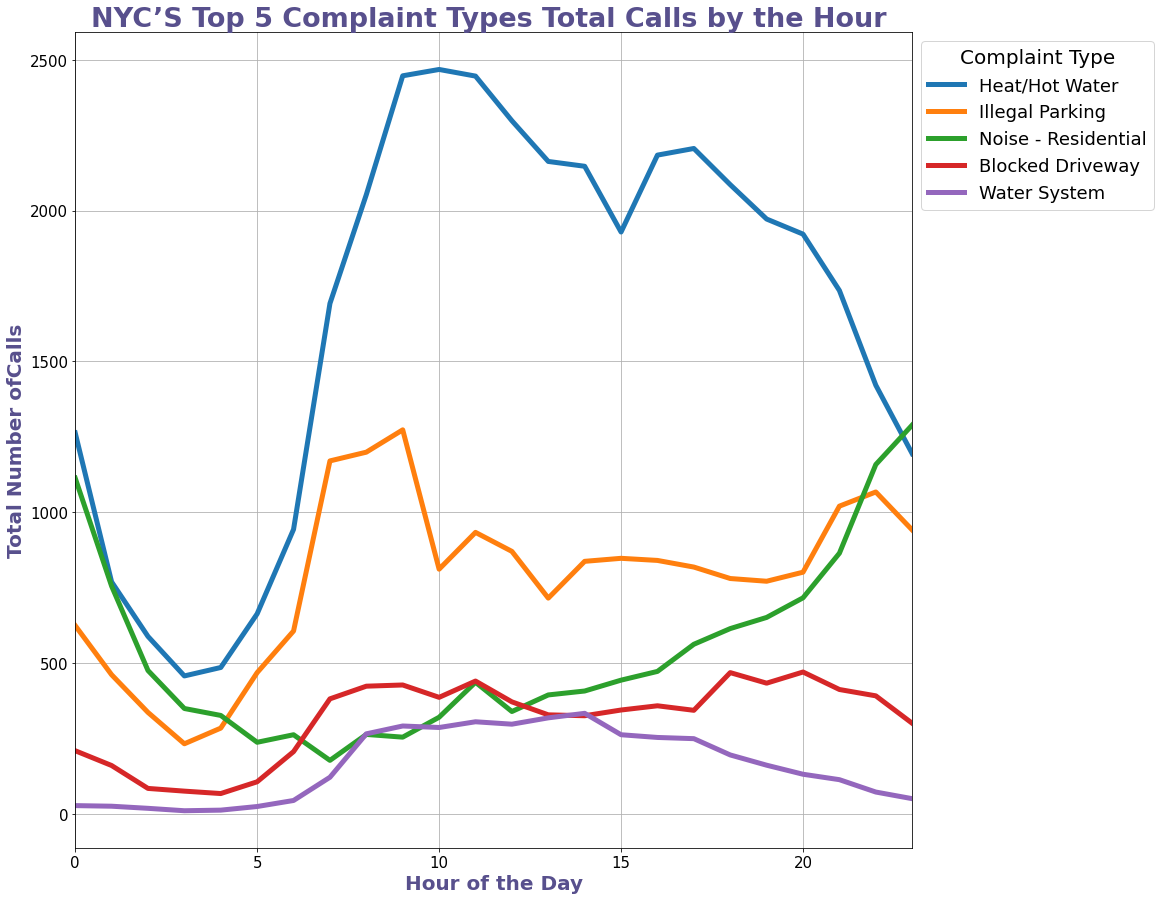

In [41]:
font_dict = dict(size=20, color="#58508d", fontweight='bold')
title_font_dict = dict(size=27, color="#58508d", fontweight='bold')

plt.figure(figsize=(15, 15))
plt.plot(heat_hot_water.index, heat_hot_water['HEAT/HOT WATER'], label="Heat/Hot Water", linewidth=5)
plt.plot(illegal_parking.index, illegal_parking['Illegal Parking'], label="Illegal Parking", linewidth=5)
plt.plot(noise_residential.index, noise_residential['Noise - Residential'], label="Noise - Residential", linewidth=5)
plt.plot(blocked_driveway.index, blocked_driveway['Blocked Driveway'], label="Blocked Driveway", linewidth=5)
plt.plot(water_system.index, water_system['Water System'], label="Water System", linewidth=5)
plt.ylabel('Total Number ofCalls', fontdict=font_dict)
plt.xlabel('Hour of the Day', fontdict=font_dict)
plt.title('NYC’S Top 5 Complaint Types Total Calls by the Hour ', fontdict=title_font_dict)
plt.legend(title="Complaint Type", title_fontsize=20, fontsize=18, 
           bbox_to_anchor=[1,1]) #position legend outside of plot
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(right=23) 
plt.xlim(left=0) 
plt.grid()


Analysis - 
This visual shows the rate(total Calls) and time(hour) in which calls of the top 5 complaint types are made. 

### Community Boards with Highest Number of Heat/Hot Water Complaints

In [44]:
df = df.rename(columns={"community_board": "Community Board"})

In [45]:
## filter dataframe for only Heat/Hot Water Complaints
## Plot by County - bar plot
heat_complaint = df[df['complaint_type'] == 'HEAT/HOT WATER']
heat_complaint = heat_complaint.groupby('Community Board').size().to_frame('size')

In [46]:
heat_complaint = heat_complaint.sort_values(by=['size'],ascending=False)
heat_complaint

,size
Community Board,
12 MANHATTAN,2499
07 BRONX,2480
05 BRONX,2137
04 BRONX,2114
10 MANHATTAN,1721
...,...
03 STATEN ISLAND,76
02 STATEN ISLAND,74
01 MANHATTAN,20


In [47]:
heat_complaint = heat_complaint.iloc[0:10]
heat_complaint

,size
Community Board,
12 MANHATTAN,2499
07 BRONX,2480
05 BRONX,2137
04 BRONX,2114
10 MANHATTAN,1721
14 BROOKLYN,1350
09 BRONX,1348
17 BROOKLYN,1180
09 BROOKLYN,1167


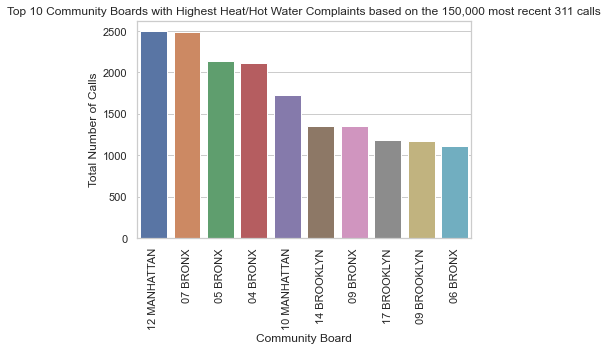

In [58]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=heat_complaint.index, y=heat_complaint['size'])
ax.set_title('Top 10 Community Boards with Highest Heat/Hot Water Complaints based on the 150,000 most recent 311 calls')
ax.set(ylabel='Total Number of Calls')
ax.tick_params(axis='x', rotation=90)

Analysis - 
Do to current News reports about heat housing issues during this winter season, I analyzed which community boards are more affected. It shows that 12 Manhattan community board had the highest rate of 311 service request calls concerning Heat/Water complaints.

### Areas/County and their most frequent complaint type

In [49]:
lead_complaint = df.groupby(['borough','complaint_type']).size().to_frame('size')
lead_complaint = lead_complaint.reset_index()
lead_complaint

,borough,complaint_type,size
0,BRONX,APPLIANCE,211
1,BRONX,Abandoned Bike,1
2,BRONX,Abandoned Vehicle,438
3,BRONX,Air Quality,33
4,BRONX,Animal Facility - No Permit,1
...,...,...,...
692,Unspecified,Street Light Condition,27
693,Unspecified,Taxi Complaint,3
694,Unspecified,Taxi Report,1
695,Unspecified,Traffic Signal Condition,23


In [ ]:
#lead_complaint_size = lead_complaint.groupby(['borough']).agg({'size': max})
#lead_complaint_size

In [50]:
lead_complaint = lead_complaint.sort_values(by='size', ascending=False)
lead_complaint = lead_complaint.drop_duplicates(subset=['borough'], keep='first')

In [51]:
lead_complaint.drop(lead_complaint[lead_complaint['borough'] == 'Unspecified'].index, inplace = True)

In [52]:
lead_complaint

,borough,complaint_type,size
49,BRONX,HEAT/HOT WATER,14630
182,BROOKLYN,HEAT/HOT WATER,10492
324,MANHATTAN,HEAT/HOT WATER,8997
475,QUEENS,Illegal Parking,5504
652,STATEN ISLAND,Street Condition,730


In [53]:
lead_complaint['Borough Complaint'] = lead_complaint['borough'] + ' - ' + lead_complaint['complaint_type']

In [54]:
lead_complaint.head()

,borough,complaint_type,size,Borough Complaint
49,BRONX,HEAT/HOT WATER,14630,BRONX - HEAT/HOT WATER
182,BROOKLYN,HEAT/HOT WATER,10492,BROOKLYN - HEAT/HOT WATER
324,MANHATTAN,HEAT/HOT WATER,8997,MANHATTAN - HEAT/HOT WATER
475,QUEENS,Illegal Parking,5504,QUEENS - Illegal Parking
652,STATEN ISLAND,Street Condition,730,STATEN ISLAND - Street Condition


## Lead Complaint Type and its Frequency by Borough Based on the 150,00 most Recent 311 Calls

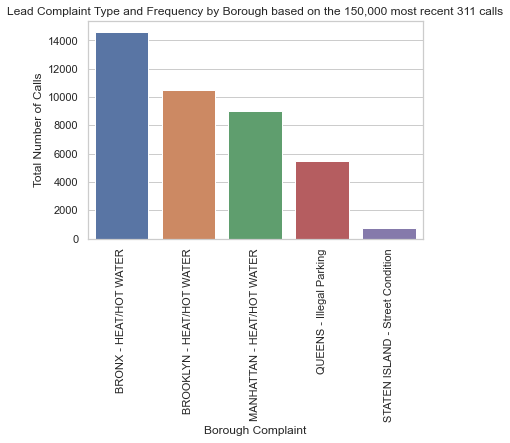

In [57]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=lead_complaint['Borough Complaint'], y=lead_complaint['size'])
ax.set_title('Lead Complaint Type and Frequency by Borough based on the 150,000 most recent 311 calls')
ax.set(ylabel='Total Number of Calls')
ax.tick_params(axis='x', rotation=90)

Analysis - 
The leading complaint type by borough and the total amount of calls made based on the 150,000 most recent calls. Heat/Hot Water complaint is the lead complaint type in the 3 boroughs of Bronx, Manhattan, and Brooklyn. The leading complaint type in Queens is illegal parking.